Rolling Statistics:
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
15627    34.804298
15628    42.533684
15629    40.658246
15630    42.848246
15631    47.063158
Name: Close (Rs.), Length: 15632, dtype: float64 0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
15627    22.302948
15628    38.153545
15629    37.214941
15630    37.305141
15631    36.923965
Name: Close (Rs.), Length: 15632, dtype: float64

ADF Test:
ADF Statistic: -11.72140144888763
p-value: 1.4105430401868297e-21
Rolling Statistics:
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
           ...    
15627   -12.548246
15628     7.729386
15629    -1.875439
15630     2.190000
15631     4.214912
Name: Close (Rs.), Length: 15631, dtype: float64 1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
           ...

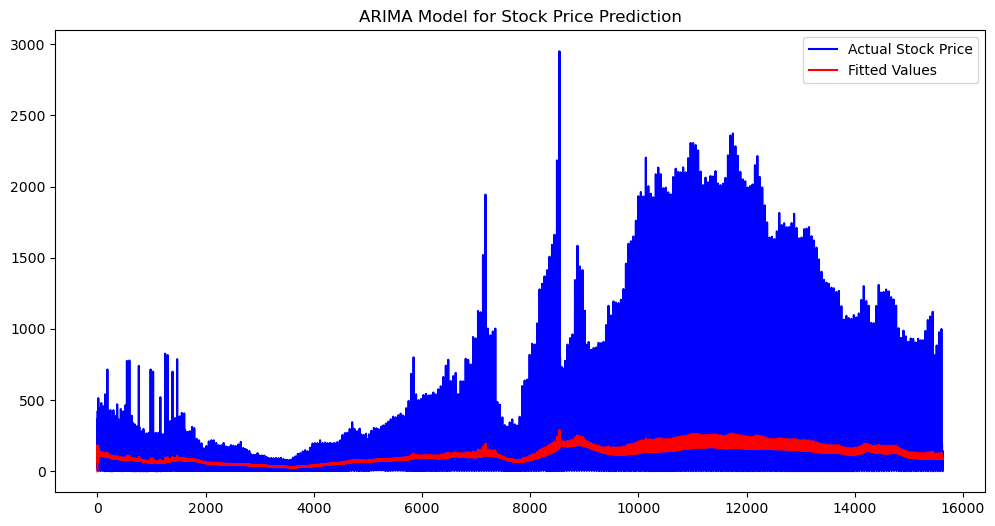

ARIMA Forecast for the next 10 steps:
15632    89.562529
15633    90.447635
15634    90.482618
15635    90.484000
15636    90.484055
15637    90.484057
15638    90.484057
15639    90.484057
15640    90.484057
15641    90.484057
Name: predicted_mean, dtype: float64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA  # Updated import statement

# Load your stock price data into a DataFrame
data = pd.read_csv('./all_data.csv')  # Replace 'your_data.csv' with the path to your dataset

# Set the integer-based index as the time component
data.set_index(np.arange(len(data)), inplace=True)

# Select the 'Close (Rs.)' column
stock_price = data['Close (Rs.)']

# Function to check stationarity
def check_stationarity(data):
    # Calculate rolling statistics
    rolling_mean = data.rolling(window=12).mean()
    rolling_std = data.rolling(window=12).std()
    
    # Perform ADF test
    adf_test = adfuller(data)
    
    # Print results
    print('Rolling Statistics:')
    print(rolling_mean, rolling_std)
    print('\nADF Test:')
    print('ADF Statistic:', adf_test[0])
    print('p-value:', adf_test[1])

# Check stationarity
check_stationarity(stock_price)

# Differencing to make the data stationary
differenced_data = stock_price.diff().dropna()

# Check stationarity of differenced data
check_stationarity(differenced_data)

# Model Selection
p, d, q = 1, 1, 1  # Example values, you may need to choose these based on ADF test results

# Create and fit the ARIMA model
model = ARIMA(stock_price, order=(p, d, q))
arima_model = model.fit()

# Model summary
print(arima_model.summary())

# Plot predictions vs. actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(stock_price, label='Actual Stock Price', color='blue')
plt.plot(arima_model.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model for Stock Price Prediction')
plt.legend()
plt.show()

# Make predictions for the next 10 time steps (change as needed)
forecast_steps = 10
forecast = arima_model.forecast(steps=forecast_steps)

# Display the forecasted values
print(f'ARIMA Forecast for the next {forecast_steps} steps:')
print(forecast)

Duplicate Index Values: DatetimeIndex(['1995-01-01', '1995-01-01', '1995-01-01', '1995-01-01',
               '1995-01-01', '1995-01-01', '1995-01-01', '1995-01-01',
               '1995-01-01', '1995-01-01',
               ...
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01'],
              dtype='datetime64[ns]', name='Date', length=15288, freq=None)


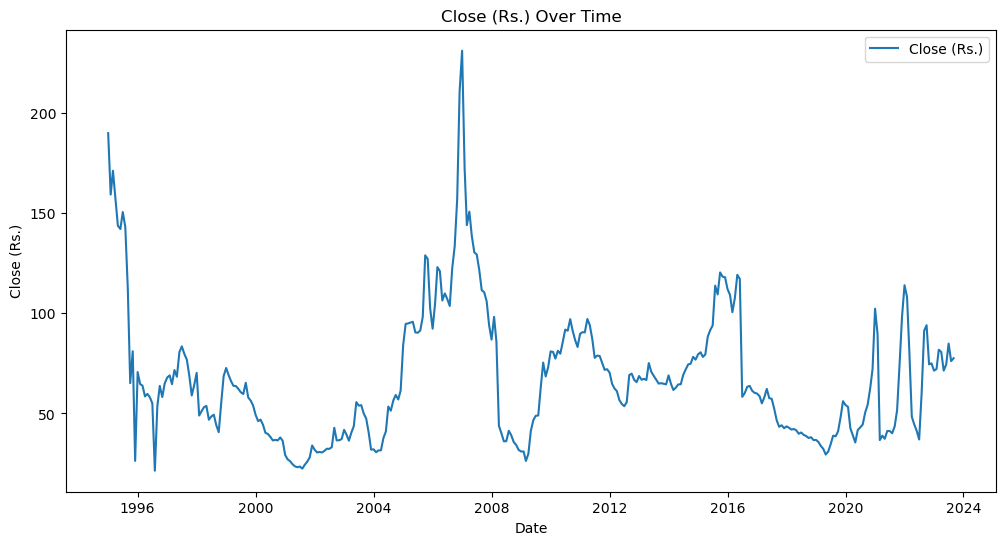

ADF Statistic: -3.3521394155979447
p-value: 0.012702742467693904


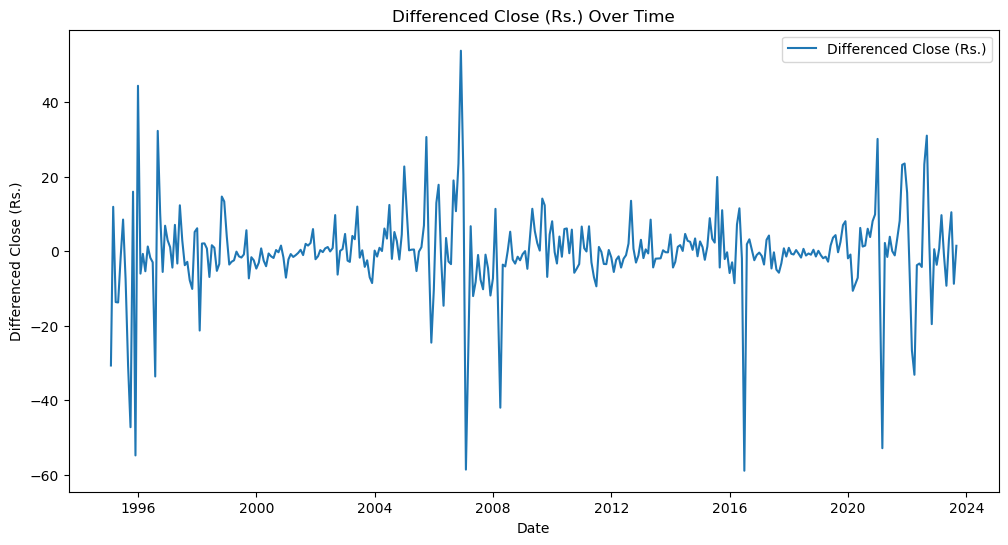

<Figure size 1200x600 with 0 Axes>

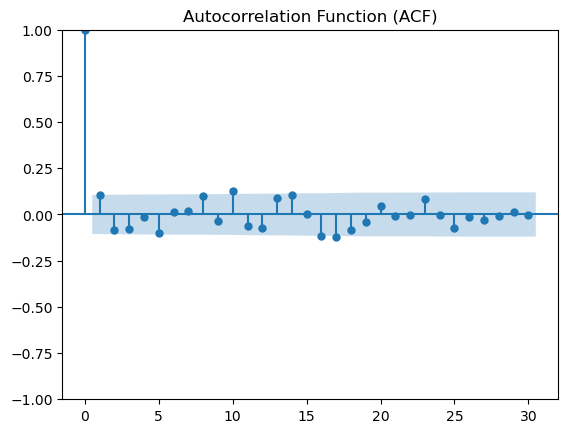

<Figure size 1200x600 with 0 Axes>

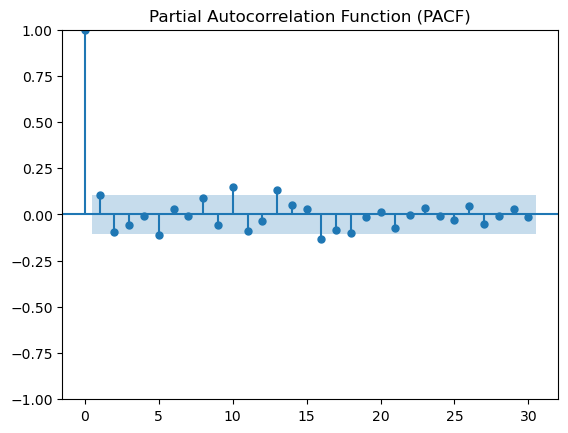

/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given wit

Root Mean Squared Error (RMSE): 6.352783723741843


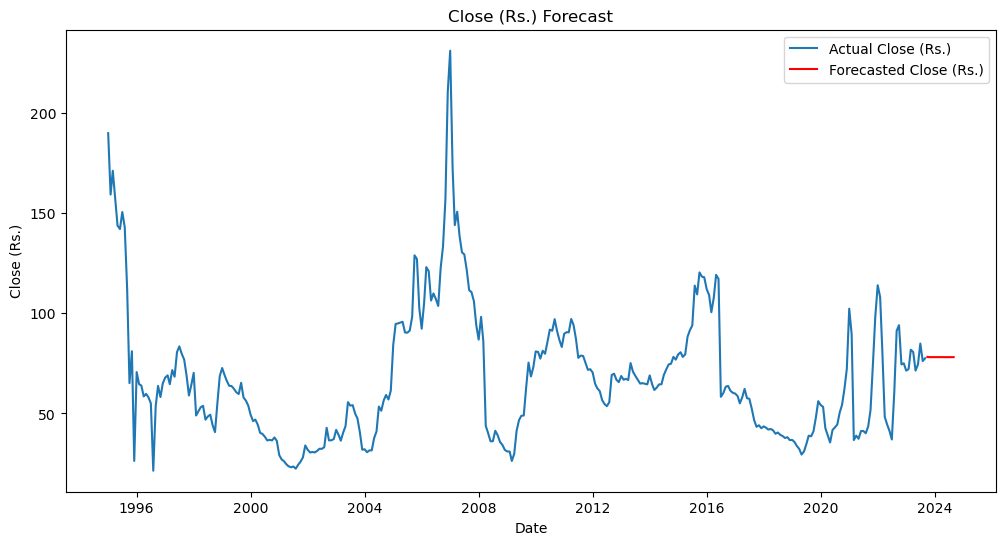

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load and preprocess data
df = pd.read_csv('./all_data.csv')  # Replace 'your_data.csv' with your dataset file path

# Set the 'Year' and 'Month' columns as a datetime index
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
df.set_index('Date', inplace=True)

# Check for duplicate index values
duplicate_index = df.index[df.index.duplicated(keep='first')]
if not duplicate_index.empty:
    print('Duplicate Index Values:', duplicate_index)
    df = df[~df.index.duplicated(keep='first')]

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(df['Close (Rs.)'], label='Close (Rs.)')
plt.title('Close (Rs.) Over Time')
plt.xlabel('Date')
plt.ylabel('Close (Rs.)')
plt.legend()
plt.show()

# Stationarity Check
result = adfuller(df['Close (Rs.)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing to make the data stationary
df['Close (Rs.)_diff'] = df['Close (Rs.)'].diff().dropna()

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(df['Close (Rs.)_diff'], label='Differenced Close (Rs.)')
plt.title('Differenced Close (Rs.) Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Close (Rs.)')
plt.legend()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 6))
plot_acf(df['Close (Rs.)_diff'].dropna(), lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Close (Rs.)_diff'].dropna(), lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Model Fitting
p, d, q = 1, 1, 1  # Adjust these values based on your analysis
model = ARIMA(df['Close (Rs.)'], order=(p, d, q))
model_fit = model.fit()

# Model Forecasting
n_forecast = 12  # Number of periods to forecast
forecast = model_fit.forecast(steps=n_forecast)

# Evaluate the Model
actual_values = df['Close (Rs.)'][-n_forecast:]
rmse = np.sqrt(mean_squared_error(actual_values, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize the Forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Close (Rs.)'], label='Actual Close (Rs.)')
plt.plot(pd.date_range(df.index[-1], periods=n_forecast, freq='M'), forecast, label='Forecasted Close (Rs.)', color='red')
plt.title('Close (Rs.) Forecast')
plt.xlabel('Date')
plt.ylabel('Close (Rs.)')
plt.legend()
plt.show()


Duplicate Index Values: DatetimeIndex(['1995-01-01', '1995-01-01', '1995-01-01', '1995-01-01',
               '1995-01-01', '1995-01-01', '1995-01-01', '1995-01-01',
               '1995-01-01', '1995-01-01',
               ...
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01'],
              dtype='datetime64[ns]', name='Date', length=15288, freq=None)


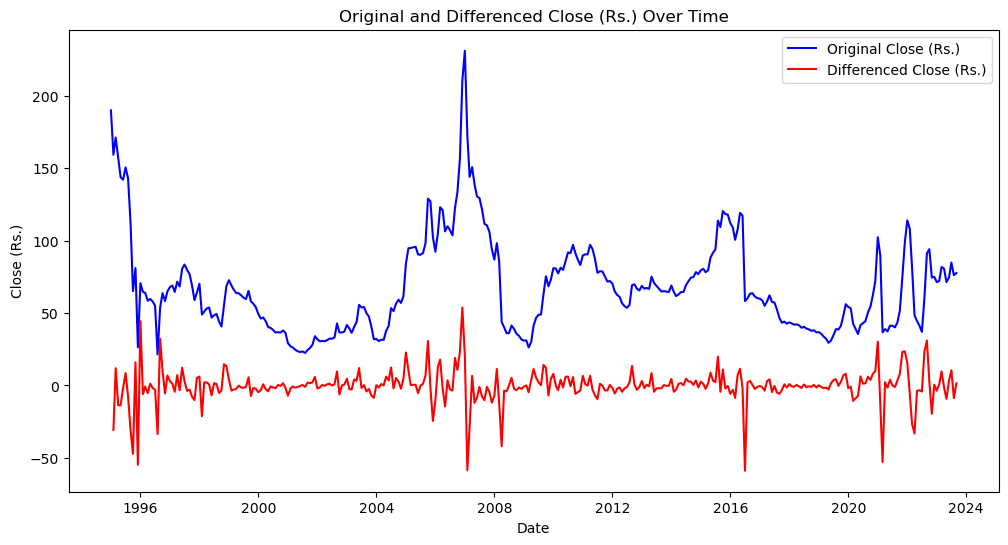

ADF Statistic: -3.3521394155979447
p-value: 0.012702742467693904


<Figure size 1200x600 with 0 Axes>

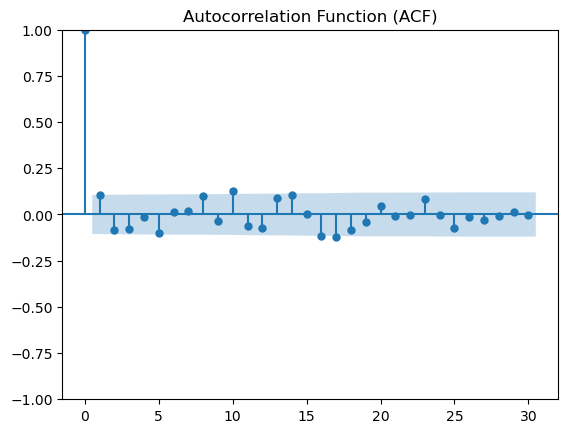

<Figure size 1200x600 with 0 Axes>

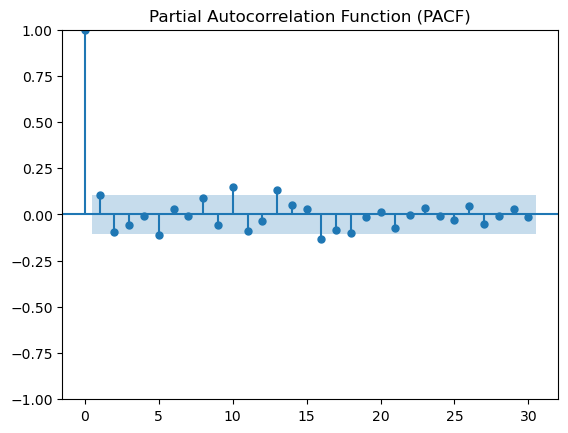

/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given wit

Root Mean Squared Error (RMSE): 6.352783723741843


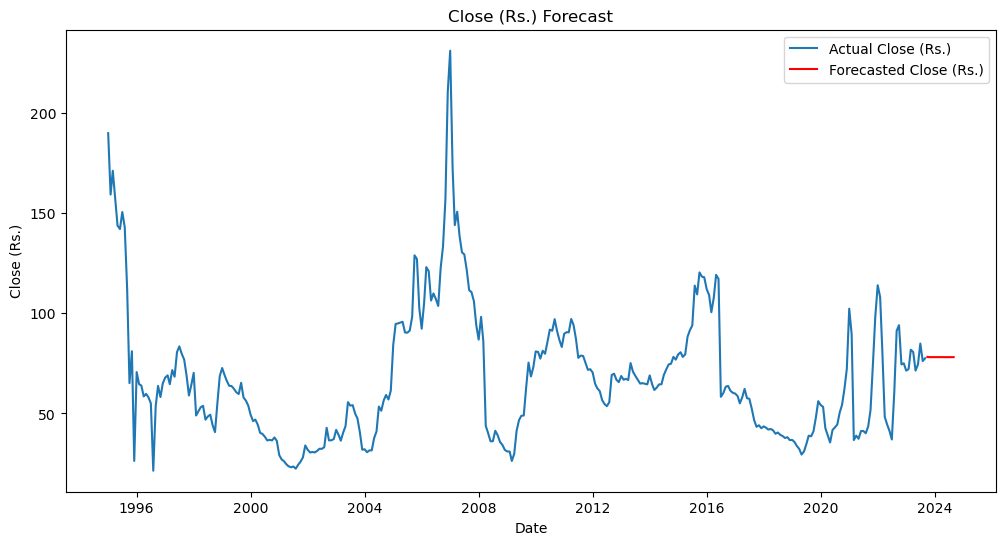

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load and preprocess data
df = pd.read_csv('./all_data.csv')  # Replace 'your_data.csv' with your dataset file path

# Set the 'Year' and 'Month' columns as a datetime index
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
df.set_index('Date', inplace=True)

# Check for duplicate index values
duplicate_index = df.index[df.index.duplicated(keep='first')]
# Check for duplicate index values
if not duplicate_index.empty:
    print('Duplicate Index Values:', duplicate_index)
    df = df[~df.index.duplicated(keep='first')]

# Create a new index for the differenced data
diff_index = df.index[1:]

# Calculate the difference of 'Close (Rs.)' and store it in a new column 'Close (Rs.)_diff'
df['Close (Rs.)_diff'] = df['Close (Rs.)'].diff()

# Plot the original data and differenced data in the same graph with different colors
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close (Rs.)'], label='Original Close (Rs.)', color='blue')
plt.plot(diff_index, df['Close (Rs.)_diff'].iloc[1:], label='Differenced Close (Rs.)', color='red')
plt.title('Original and Differenced Close (Rs.) Over Time')
plt.xlabel('Date')
plt.ylabel('Close (Rs.)')
plt.legend()
plt.show()

# Stationarity Check
result = adfuller(df['Close (Rs.)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 6))
plot_acf(df['Close (Rs.)_diff'].dropna(), lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Close (Rs.)_diff'].dropna(), lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Model Fitting
p, d, q = 1, 1, 1  # Adjust these values based on your analysis
model = ARIMA(df['Close (Rs.)'], order=(p, d, q))
model_fit = model.fit()

# Model Forecasting
n_forecast = 12  # Number of periods to forecast
forecast = model_fit.forecast(steps=n_forecast)

# Evaluate the Model
actual_values = df['Close (Rs.)'][-n_forecast:]
rmse = np.sqrt(mean_squared_error(actual_values, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize the Forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Close (Rs.)'], label='Actual Close (Rs.)')
plt.plot(pd.date_range(df.index[-1], periods=n_forecast, freq='M'), forecast, label='Forecasted Close (Rs.)', color='red')
plt.title('Close (Rs.) Forecast')
plt.xlabel('Date')
plt.ylabel('Close (Rs.)')
plt.legend()
plt.show()